In [124]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [125]:
df = pd.read_csv('owid-energy-data.csv')
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21890 entries, 0 to 21889
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.5+ MB


In [127]:
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']
df1 = df[df['country'].isin(continents)]

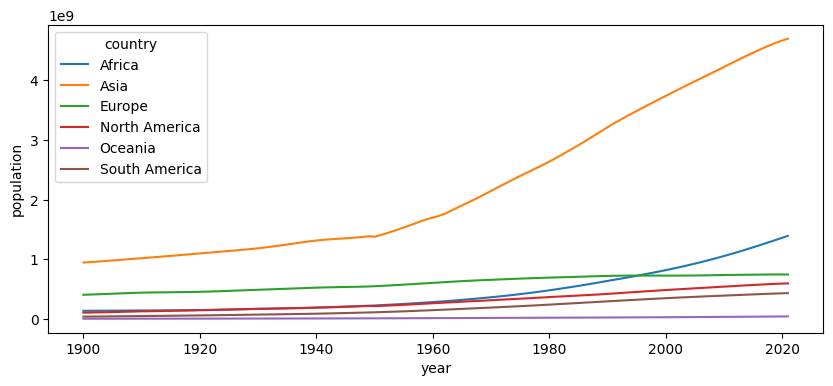

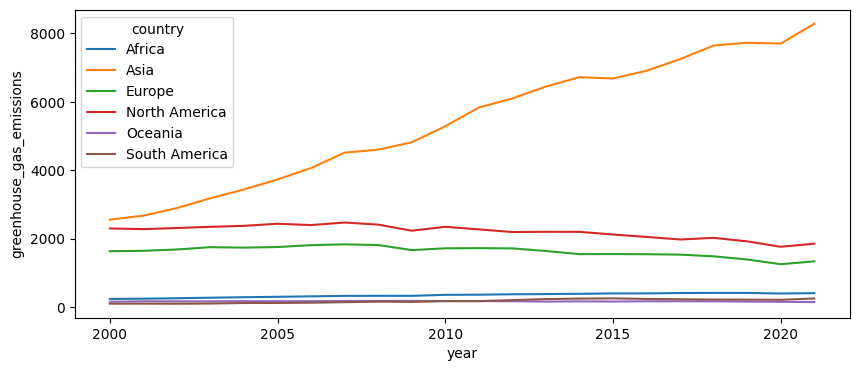

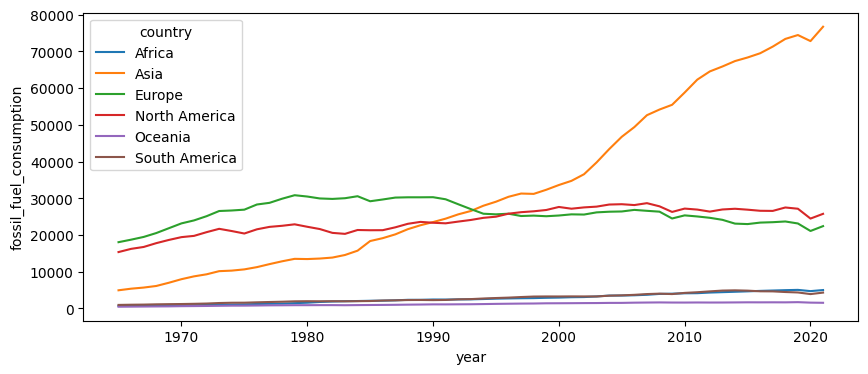

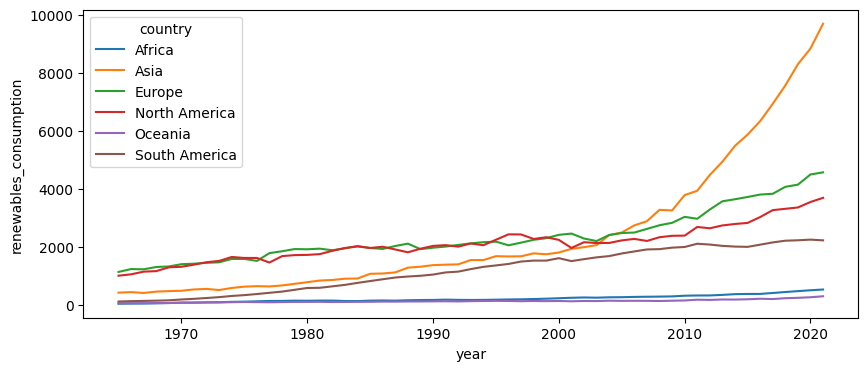

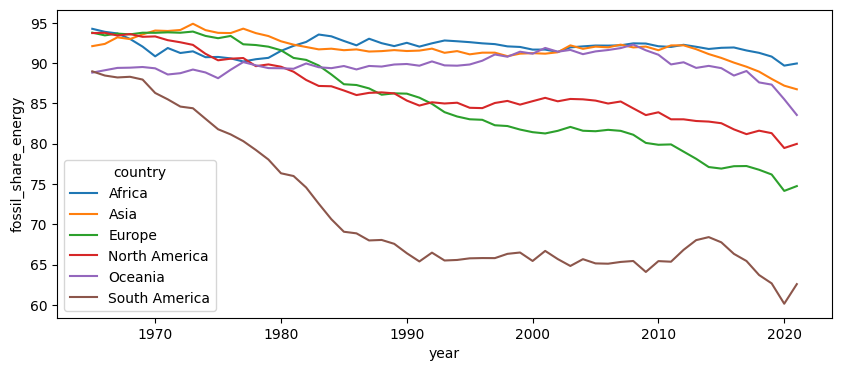

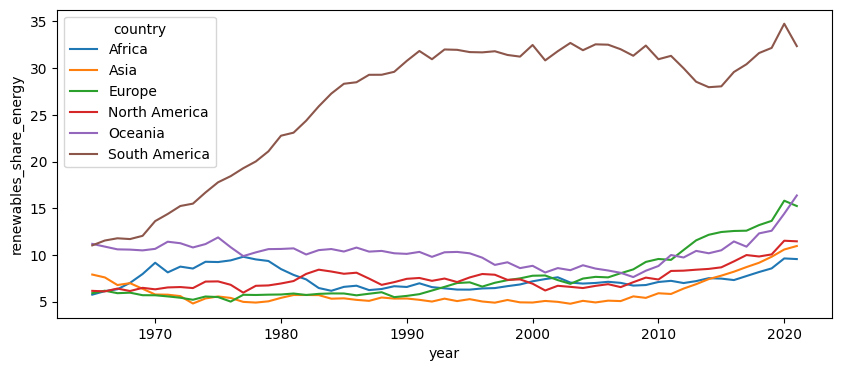

In [128]:
continent_plotting_metrics = ['population', 'greenhouse_gas_emissions', 'fossil_fuel_consumption', 'renewables_consumption', 'fossil_share_energy', 'renewables_share_energy']

for metric in continent_plotting_metrics:
    figure = plt.figure(figsize=(10,4))
    sb.lineplot(data=df1, x = 'year', y = metric, hue = 'country')

We take reference to renewables_share_energy and look at 1965 onwards for our remaining data.

This is because a large proportion of data before 1965 is missing, making the columns unusable. A visual inspection in the excel file will verify this.

In [129]:
df2 = df1[(df1['country'] == 'South America') & (df1['year'] > 1964)]
df2.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
17778,South America,1965,NaN,170706949.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17779,South America,1966,NaN,175135459.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17780,South America,1967,NaN,179569020.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17781,South America,1968,NaN,184011029.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17782,South America,1969,NaN,188469386.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1st round of column filtering:** Handling columns with null values

**Justification:** Remove columns with significantly large null values and extrapolating columns with little null values

We drop values that have significantly high number of null values. Since the number of rows is **57**, we are more strict on the number of values to tolerate and set it to **5** as we need to have sufficient data to make extrapolated values.

In [130]:
# initialise dataframe with all columns as index, and number of null values in dataframe's columns
df_col_null = pd.DataFrame(df2.isnull().sum().sort_values(ascending=False))

# narrow down the clean columns
df_col_clean = df_col_null[df_col_null.loc[:, 0] < 6]
df_col_clean

,0
nuclear_cons_change_twh,1
coal_cons_change_twh,1
oil_cons_change_pct,1
oil_cons_change_twh,1
coal_cons_change_pct,1
...,...
year,0
hydro_share_energy,0
hydro_energy_per_capita,0
hydro_electricity,0


In [131]:
# find the year in which the single null value exists
for col in list(df_col_clean[df_col_clean[0] == 1].index):
    year = []
    col_year = df2['year'][df2[col].isnull()].iloc[0]
    if col_year not in year:
        year.append(col_year)
print(year)

[1965]


We see that the remaining columns are all missing 1 null value and a quick check reveals that they all happen in 1965. As it is merely one row, we drop 1965's data as well

In [132]:
df2_clean = df2[df2['year'] > 1965].loc[:, df_col_clean.index]
df2_clean.index = range(1966, 1966 + len(df2_clean))
df2_clean = df2_clean.drop('country', axis=1)

**2nd round of column filtering**: Correlated columns to renewables_share_energy

With the cleaned data, we use feature importance to determine which feature can best complement renewables_share_energy.

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# split the data into training and testing sets - 80% train, 20% test (i.e. 45 for train, 11 for test) - preserve chronological order of data
train = df2_clean.iloc[:46]
test = df2_clean.iloc[46:]

# define features and target variable
features = list(df2_clean.columns.drop('renewables_share_energy'))
target = 'renewables_share_energy'

# train a random forest model
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(train[features], train[target])

# evaluate the model on the testing set
mse = mean_squared_error(test[target], model.predict(test[features]))

# print the mean squared error
print(f"MSE: {mse}")
print()

# identify important features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(len(features)):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

MSE: 3.4519153573714156

1. oil_share_energy (0.124535)
2. fossil_share_energy (0.117640)
3. other_renewables_share_energy (0.055702)
4. other_renewable_electricity (0.053567)
5. gas_share_energy (0.051006)
6. gas_energy_per_capita (0.043825)
7. hydro_consumption (0.041517)
8. nuclear_energy_per_capita (0.036230)
9. gas_prod_per_capita (0.032353)
10. hydro_electricity (0.030355)
11. hydro_share_energy (0.029717)
12. other_renewables_energy_per_capita (0.028726)
13. gas_consumption (0.028040)
14. renewables_consumption (0.027244)
15. primary_energy_consumption (0.026988)
16. low_carbon_share_energy (0.022172)
17. nuclear_elec_per_capita (0.020555)
18. coal_consumption (0.020133)
19. gas_production (0.019526)
20. other_renewables_elec_per_capita (0.019084)
21. other_renewable_consumption (0.018687)
22. year (0.018206)
23. fossil_fuel_consumption (0.013475)
24. low_carbon_elec_per_capita (0.012229)
25. renewables_energy_per_capita (0.011641)
26. population (0.011616)
27. hydro_energy_per_

We compare this with the GradientBoosting model with similar parameters.

In [134]:
from sklearn.ensemble import GradientBoostingRegressor

# split the data into training and testing sets - 80% train, 20% test (i.e. 45 for train, 11 for test) - preserve chronological order of data
train = df2_clean.iloc[:46]
test = df2_clean.iloc[46:]

# train a gradient boosting model
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model_gb.fit(train[features], train[target])

# evaluate the model on the testing set
mse = mean_squared_error(test[target], model_gb.predict(test[features]))

# print the mean squared error
print(f"MSE: {mse}")
print()

# identify important features
importances = model_gb.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(len(features)):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

MSE: 2.7890153935741195

1. fossil_share_energy (0.223658)
2. other_renewable_electricity (0.141001)
3. gas_production (0.137626)
4. hydro_share_energy (0.093212)
5. hydro_energy_per_capita (0.072085)
6. hydro_elec_per_capita (0.059162)
7. other_renewables_share_energy (0.050690)
8. other_renewables_elec_per_capita (0.036559)
9. gas_share_energy (0.032092)
10. low_carbon_share_energy (0.022671)
11. renewables_consumption (0.019851)
12. oil_prod_per_capita (0.018114)
13. oil_share_energy (0.014687)
14. nuclear_electricity (0.012208)
15. nuclear_consumption (0.010048)
16. hydro_electricity (0.010040)
17. low_carbon_elec_per_capita (0.007422)
18. gas_prod_per_capita (0.006272)
19. low_carbon_energy_per_capita (0.005429)
20. hydro_cons_change_twh (0.003722)
21. primary_energy_consumption (0.003684)
22. oil_production (0.003153)
23. fossil_fuel_consumption (0.002191)
24. coal_consumption (0.001581)
25. low_carbon_consumption (0.001145)
26. energy_per_capita (0.001114)
27. renewables_cons_ch

For now, we will use the rankings selected by GradientBoosting. This is because it works better with fewer training samples as it helps to generalise data more by building decision trees in a sequential manner, where each new tree attempts to correct the attempts made by previous trees. RandomForest on the other hand may be too deep and specific to the training set, leading to overfitting.

Thus, the 5 selected columns are: **'other_renewable_electricity', 'gas_production', 'hydro_energy_per_capita', 'renewables_consumption', 'oil_prod_per_capita'.**

Note that while hydro_elec_per_capita is ranked 4th excluding 'share_energy' columns, it is a duplicate of hydro_energy_per_capita and thus we leave it out.

## Machine Learning - South America's Linear Regression / ARIMA / Exponential Smoothing Model

In [135]:
sa_metrics = ['other_renewable_electricity', 'gas_production', 'hydro_energy_per_capita', 'renewables_consumption', 'oil_prod_per_capita']

sa_df = df2_clean[['renewables_share_energy'] + sa_metrics]

### Linear Regression Model

Mean Squared Error: 14.55570151465493
R-squared: 0.6946607418909935


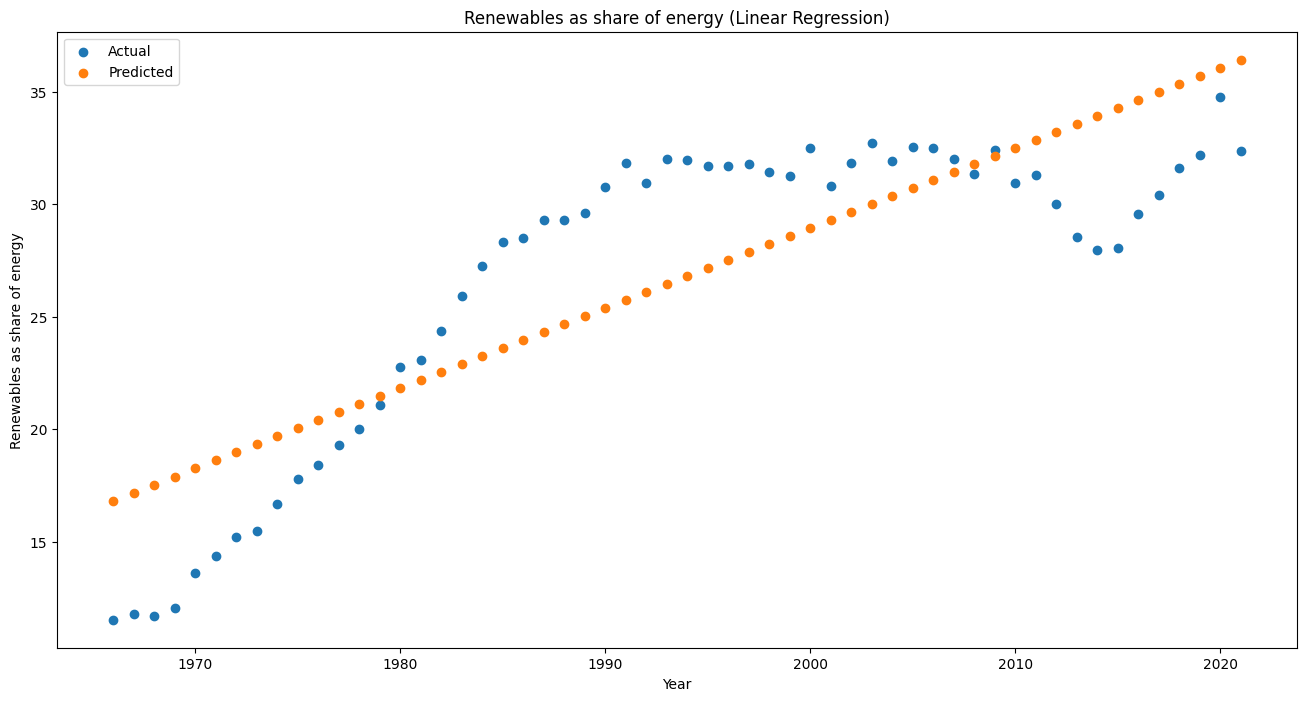

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# intialise x and y values
x = pd.DataFrame(sa_df.index)
y = sa_df['renewables_share_energy']

# initialize the linear regression model
linreg = LinearRegression()

# fit the model on the training data
linreg.fit(x, y)

# make predictions on the test data
y_pred = linreg.predict(x)

# plot scatter plot and predicted linear graph
fig = plt.figure(figsize=(16,8))
plt.scatter(x, y, color='#1f77b4', label='Actual')
plt.scatter(x, y_pred, color='#ff7f0e', label='Predicted')

# add labels, title and legend
plt.xlabel('Year')
plt.ylabel('Renewables as share of energy')
plt.title('Renewables as share of energy (Linear Regression)')
plt.legend()

# calculate mean squared error
mse = mean_squared_error(y, y_pred)
print('Mean Squared Error:', mse)

# calculate R-squared
r2 = r2_score(y, y_pred)
print('R-squared:', r2)

We use the trained model to predict future values up to 2050.

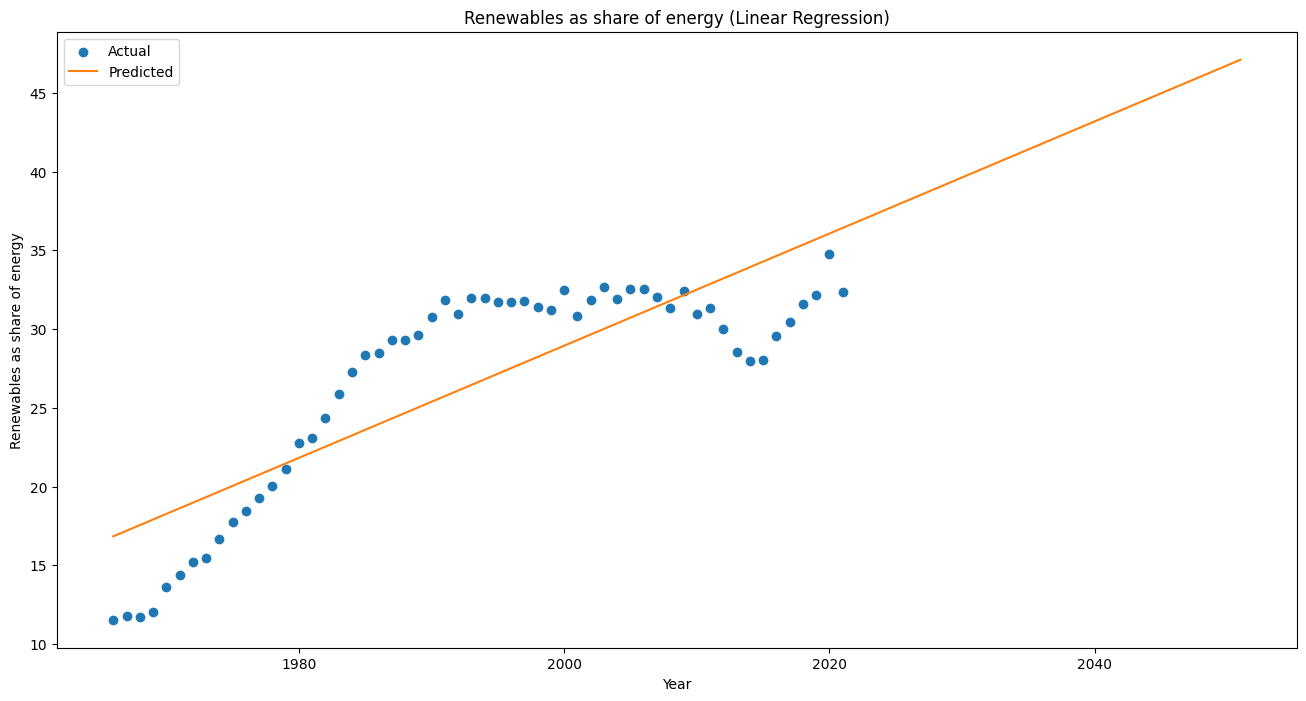

In [166]:
x_fc = np.arange(1966, 2052).reshape(-1, 1)
y_fc = linreg.predict(x_fc)

# plot actual data and predicted data
fig = plt.figure(figsize=(16,8))
plt.scatter(x, y, color='#1f77b4', label='Actual')
plt.plot(x_fc, y_fc, color='#ff7f0e', label='Predicted')

# add labels and title
plt.xlabel('Year')
plt.ylabel('Renewables as share of energy')
plt.title('Renewables as share of energy (Linear Regression)')

# add legend
plt.legend()

We definitely cannot use Linear Regression to forecast the data to 2050 as the trend is non-linear. However, we still note that it predicts that in 2050, South America will have around 47% of energy derived from renewables.

Hence, we move on to a new model called **Exponential Smoothing**.

### Exponential Smoothing (Additive & Multiplicative)

In [138]:
from statsmodels.tsa.api import ExponentialSmoothing

# initialise relevant data for predictions
expsmooth_df = pd.DataFrame(sa_df['renewables_share_energy'])

# grid search for alpha and beta (additive)
best_score, best_params = float("inf"), None
for alpha in np.arange(0, 1.1, 0.1):
    for beta in np.arange(0, 1.1, 0.1):
        model = ExponentialSmoothing(expsmooth_df, trend='add', damped=True, initialization_method='estimated')
        model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)
        yhat = model_fit.forecast(steps=len(expsmooth_df))
        mse = mean_squared_error(expsmooth_df, yhat)
        if mse < best_score:
            best_score, best_params = mse, (alpha, beta)

print('Best MSE (Additive): %.3f' % best_score)
print('Best Parameters (Additive): alpha=%.1f, beta=%.1f' % (best_params[0], best_params[1]))
print()

# grid search for alpha and beta (multiplicative)
best_score_m, best_params_m = float("inf"), None
for alpha in np.arange(0, 1.1, 0.1):
    for beta in np.arange(0, 1.1, 0.1):
        model = ExponentialSmoothing(expsmooth_df, trend='mul', damped=True, initialization_method='estimated')
        model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)
        yhat = model_fit.forecast(steps=len(expsmooth_df))
        mse = mean_squared_error(expsmooth_df, yhat)
        if mse < best_score_m:
            best_score_m, best_params_m = mse, (alpha, beta)

print('Best MSE (Multiplicative): %.3f' % best_score_m)
print('Best Parameters (Multiplicative): alpha=%.1f, beta=%.1f' % (best_params_m[0], best_params_m[1]))

Best MSE (Additive): 58.661
Best Parameters (Additive): alpha=1.0, beta=0.7

Best MSE (Multiplicative): 58.281
Best Parameters (Multiplicative): alpha=1.0, beta=0.8


#### Additive Exponential Smoothing Curve

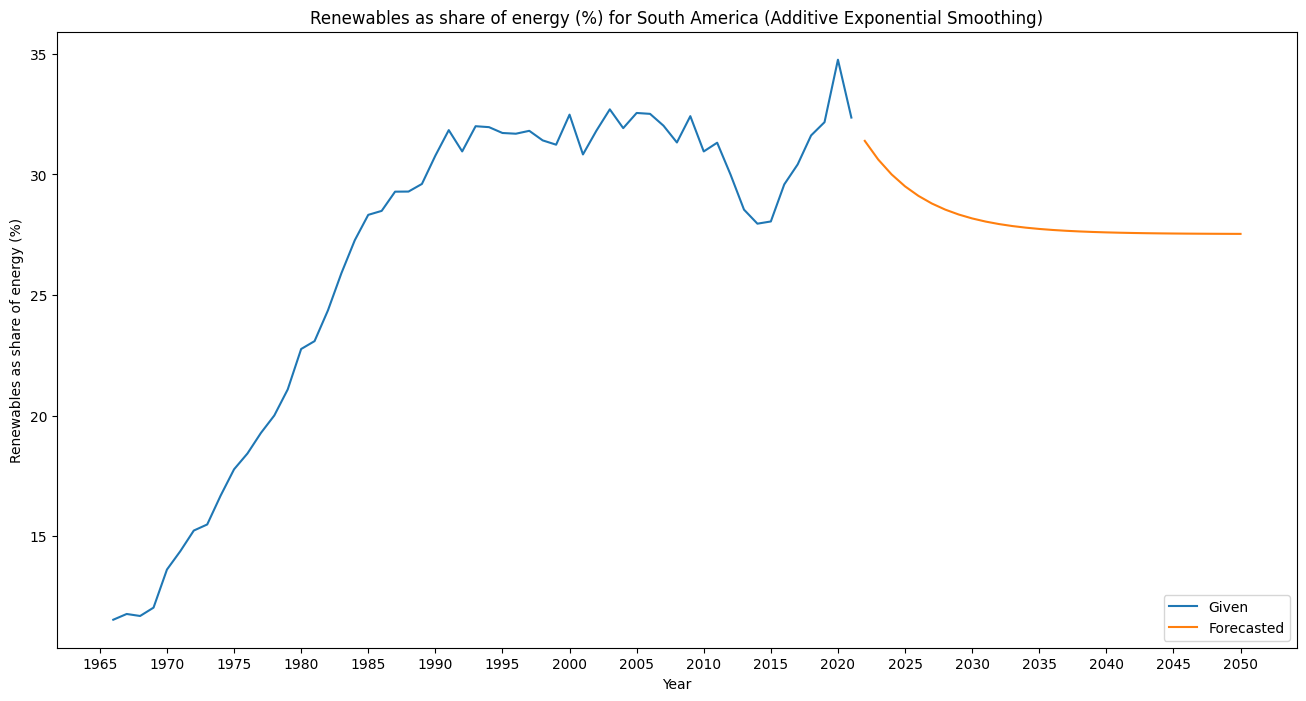

In [139]:
# initialise prediction range
start_year = 2022
end_year = 2050
forecast_index = pd.Series(list(np.arange(start_year,end_year+1)))

# make prediction using the best parameters
model_add = ExponentialSmoothing(expsmooth_df, trend='add', damped=True, initialization_method='estimated')
model_add_fit = model_add.fit(smoothing_level=best_params[0], smoothing_slope=best_params[1])

# make forecasting and add to new dataframe
y_add = model_add_fit.forecast(steps=len(forecast_index))
y_add_df = pd.DataFrame(y_add)
y_add_df.rename({0:'forecast_renewables'}, axis=1, inplace=True)
y_add_df.set_index(forecast_index, inplace=True)

# plot past data with future data
expsmooth_add = pd.concat([expsmooth_df, y_add_df])

fig = plt.figure(figsize=(16,8))
plt.plot(expsmooth_add['renewables_share_energy'], label='Given')
plt.plot(expsmooth_add['forecast_renewables'], label = 'Forecasted')
plt.title('Renewables as share of energy (%) for South America (Additive Exponential Smoothing)')
plt.xlabel('Year')
plt.ylabel('Renewables as share of energy (%)')
plt.xticks(np.arange(min(expsmooth_add.index) - 1, max(expsmooth_add.index)+1, 5))
plt.legend(loc='lower right', );

#### Multiplicative Exponential Smoothing Curve

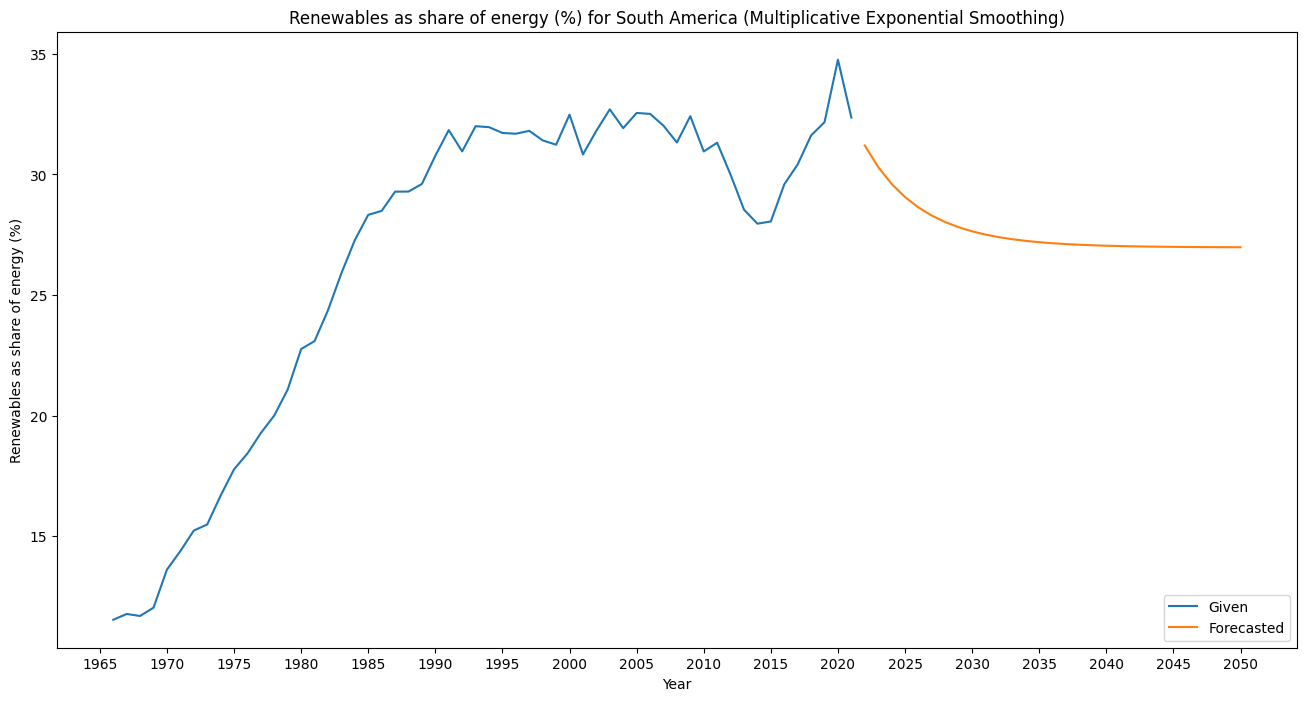

In [140]:
# make prediction using the best parameters
model_mul = ExponentialSmoothing(expsmooth_df, trend='mul', damped=True, initialization_method='estimated')
model_mul_fit = model_mul.fit(smoothing_level=best_params_m[0], smoothing_slope=best_params_m[1])

# make forecasting and add to new dataframe
y_mul = model_mul_fit.forecast(steps=len(forecast_index))
y_mul_df = pd.DataFrame(y_mul)
y_mul_df.rename({0:'forecast_renewables'}, axis=1, inplace=True)
y_mul_df.set_index(forecast_index, inplace=True)

# plot past data with future data
expsmooth_mul = pd.concat([expsmooth_df, y_mul_df])

fig = plt.figure(figsize=(16,8))
plt.plot(expsmooth_mul['renewables_share_energy'], label='Given')
plt.plot(expsmooth_mul['forecast_renewables'], label = 'Forecasted')
plt.title('Renewables as share of energy (%) for South America (Multiplicative Exponential Smoothing)')
plt.xlabel('Year')
plt.ylabel('Renewables as share of energy (%)')
plt.xticks(np.arange(min(expsmooth_mul.index) - 1, max(expsmooth_mul.index)+1, 5))
plt.legend(loc='lower right', );

Grid searching for the best alpha and beta via MSE is not the best way to find the ideal parameters. Hence, based on the visualisation, we deduce the following:

**Alpha can be set to a higher value between 0.8 and 1** as we want to take into account the jump from 2016 onwards (likely attributed to increased investments in renewables in the energy)

**Beta can be set to a lower value between 0.1 to 0.3** as we still want to capture the overall trend from 1965 and dampen the plateau between 1990 to 2010.

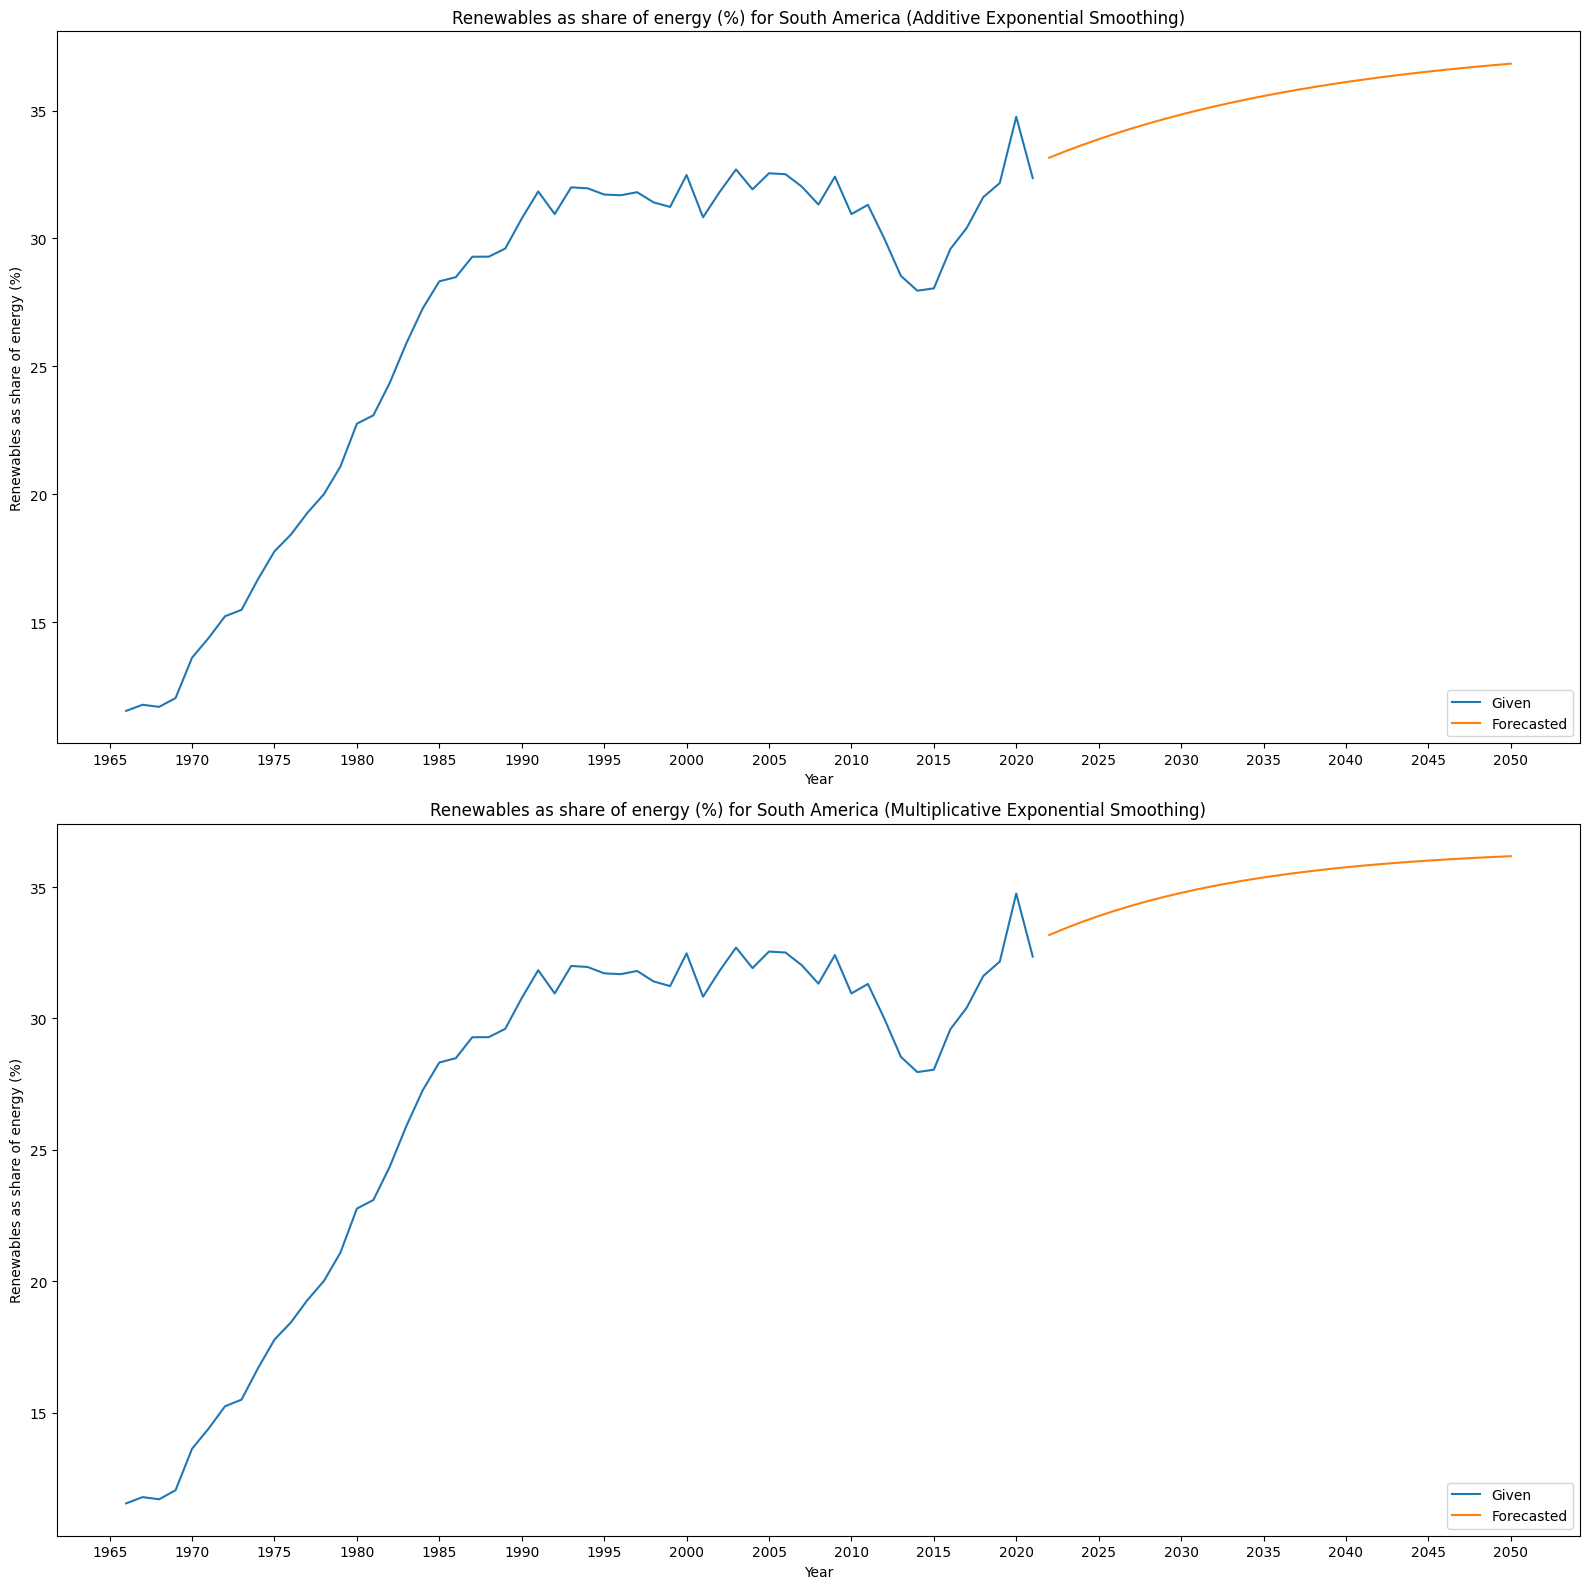

In [141]:
# set alpha and beta parameters
alpha = 0.8
beta = 0.2

# additive exponential smoothing
model_add = ExponentialSmoothing(expsmooth_df, trend='add', damped=True, initialization_method='estimated')
model_add_fit = model_add.fit(smoothing_level=alpha, smoothing_slope=beta)

y_add = model_add_fit.forecast(steps=len(forecast_index))
y_add_df = pd.DataFrame(y_add)
y_add_df.rename({0:'forecast_renewables'}, axis=1, inplace=True)
y_add_df.set_index(forecast_index, inplace=True)

expsmooth_add = pd.concat([expsmooth_df, y_add_df])
fig, ax = plt.subplots(2, 1, figsize=(16,16))
ax[0].plot(expsmooth_add['renewables_share_energy'], label='Given')
ax[0].plot(expsmooth_add['forecast_renewables'], label = 'Forecasted')
ax[0].set_title('Renewables as share of energy (%) for South America (Additive Exponential Smoothing)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Renewables as share of energy (%)')
ax[0].set_xticks(np.arange(min(expsmooth_add.index) - 1, max(expsmooth_add.index)+1, 5))
ax[0].legend(loc='lower right', )

# multiplicative exponential smoothing
model_mul = ExponentialSmoothing(expsmooth_df, trend='mul', damped=True, initialization_method='estimated')
model_mul_fit = model_mul.fit(smoothing_level=alpha, smoothing_slope=beta)

y_mul = model_mul_fit.forecast(steps=len(forecast_index))
y_mul_df = pd.DataFrame(y_mul)
y_mul_df.rename({0:'forecast_renewables'}, axis=1, inplace=True)
y_mul_df.set_index(forecast_index, inplace=True)

expsmooth_mul = pd.concat([expsmooth_df, y_mul_df])

ax[1].plot(expsmooth_mul['renewables_share_energy'], label='Given')
ax[1].plot(expsmooth_mul['forecast_renewables'], label = 'Forecasted')
ax[1].set_title('Renewables as share of energy (%) for South America (Multiplicative Exponential Smoothing)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Renewables as share of energy (%)')
ax[1].set_xticks(np.arange(min(expsmooth_mul.index) - 1, max(expsmooth_mul.index)+1, 5))
ax[1].legend(loc='lower right', )

plt.tight_layout()

We see that Exponential Smoothing (Additive & Multiplicative) forecasts the data decently well. We look at a more detailed model called the **Auto Regressive Integrated Moving Average (ARIMA)** model.

### ARIMA Model

Broken down into 3 parameters with non-negative integer values:

**1. Auto Regressive (p)**

    - uses its previous predictions as inputs for future predictions ("auto" portion)
    - p is the number of past values included in the AR model

**2. Integrated (d)**

    - if not stationary, time series has to be differenced to become stationary (i.e. compute the difference between consecutive observations)
    - d is the number of times the time series is differenced
    
**3. Moving Average (q)**

    - uses past forecast errors to make future prediction
    - q is the number of past forecast errors in the MA model

In [142]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

renewables_share_energy 1st order differencing p-value: 0.1302871384422642
renewables_share_energy 2nd order differencing p-value: 8.141348204038887e-15

other_renewable_electricity 1st order differencing p-value: 0.5052592624060414
other_renewable_electricity 2nd order differencing p-value: 0.02900572518036852

gas_production 1st order differencing p-value: 0.004711954999198957
gas_production 2nd order differencing p-value: 0.0006897948680285488

hydro_energy_per_capita 1st order differencing p-value: 0.9853770363784132
hydro_energy_per_capita 2nd order differencing p-value: 0.0020486589828012346

renewables_consumption 1st order differencing p-value: 1.099037838420102e-08
renewables_consumption 2nd order differencing p-value: 0.0005069680710817352

oil_prod_per_capita 1st order differencing p-value: 0.0029453677522901516
oil_prod_per_capita 2nd order differencing p-value: 4.217982771200364e-05



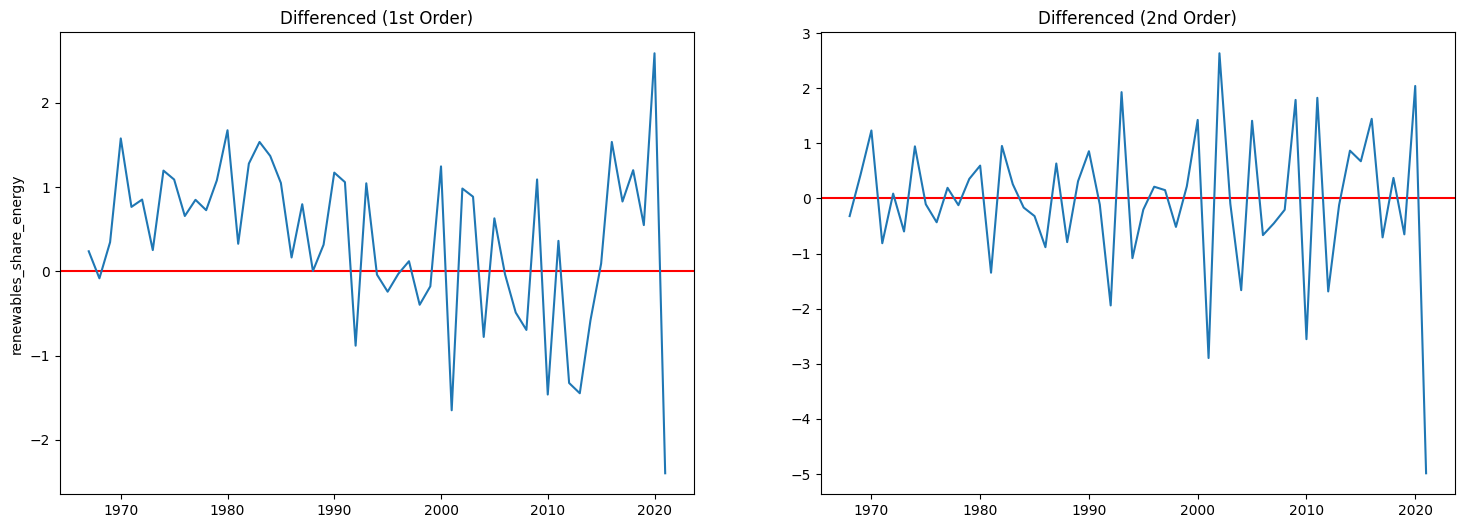

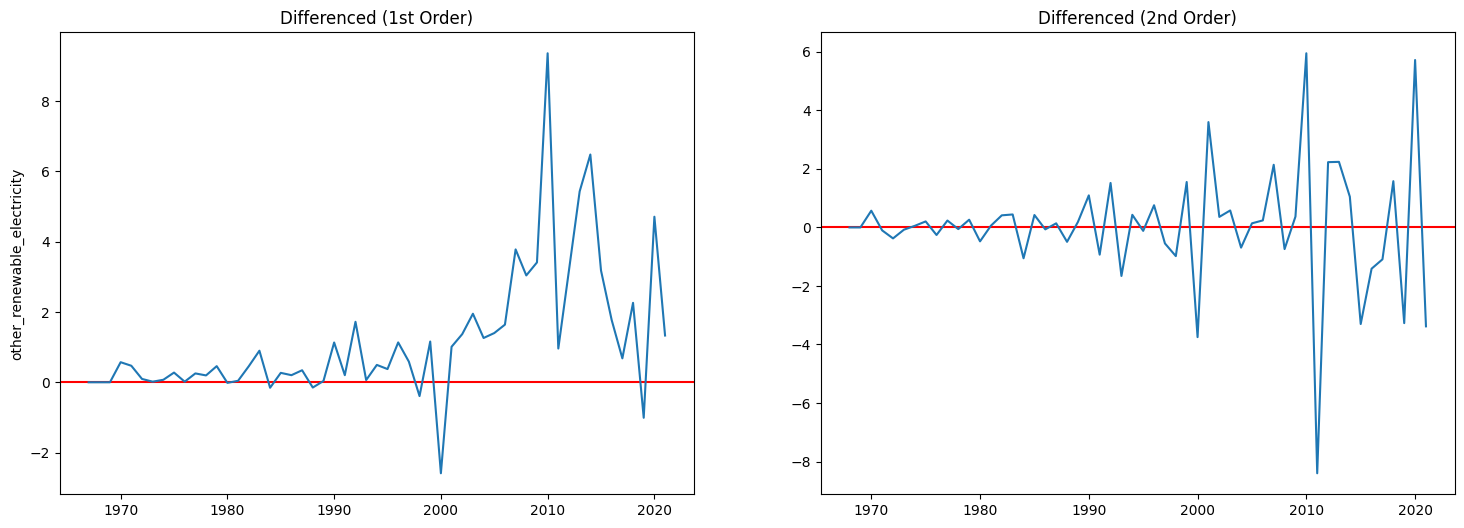

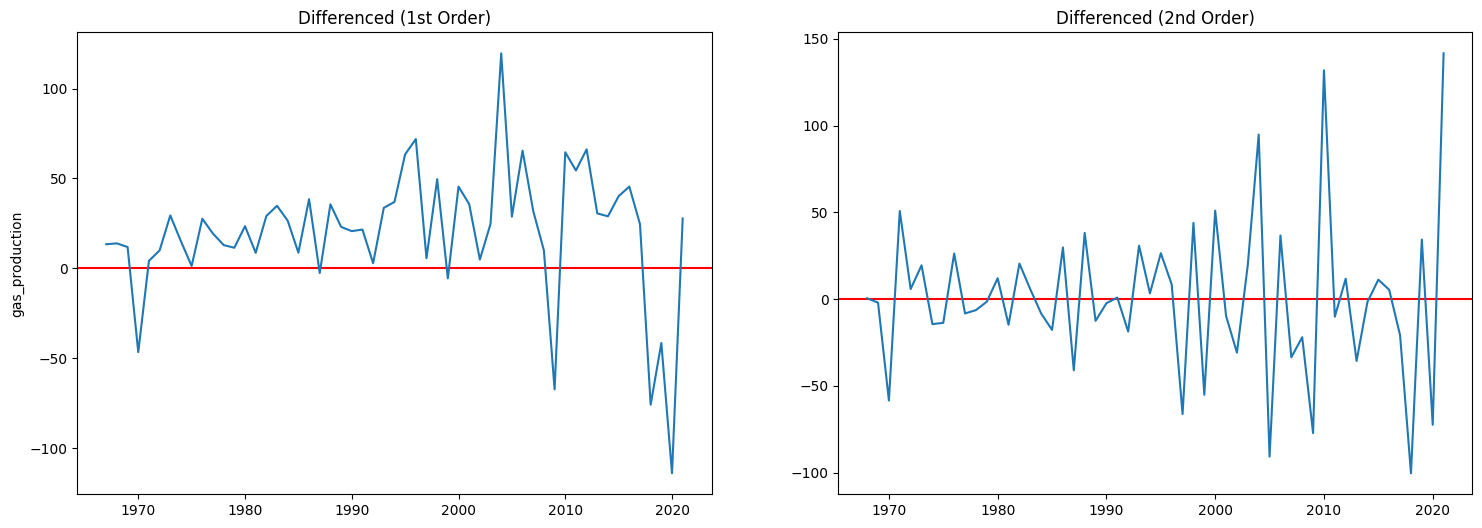

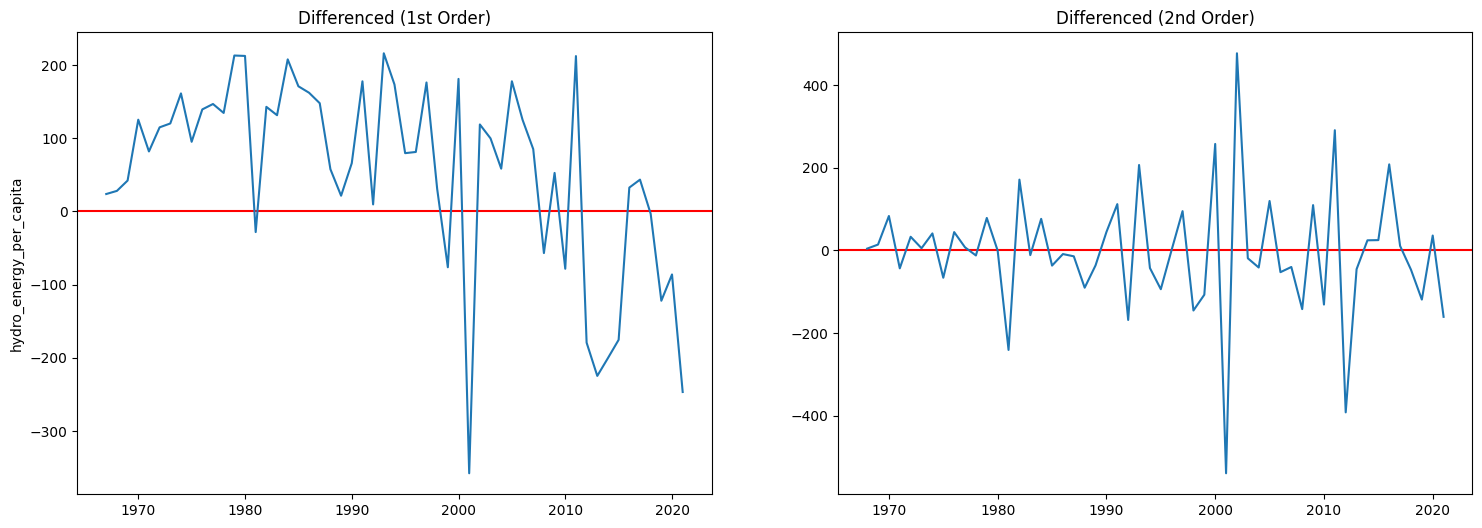

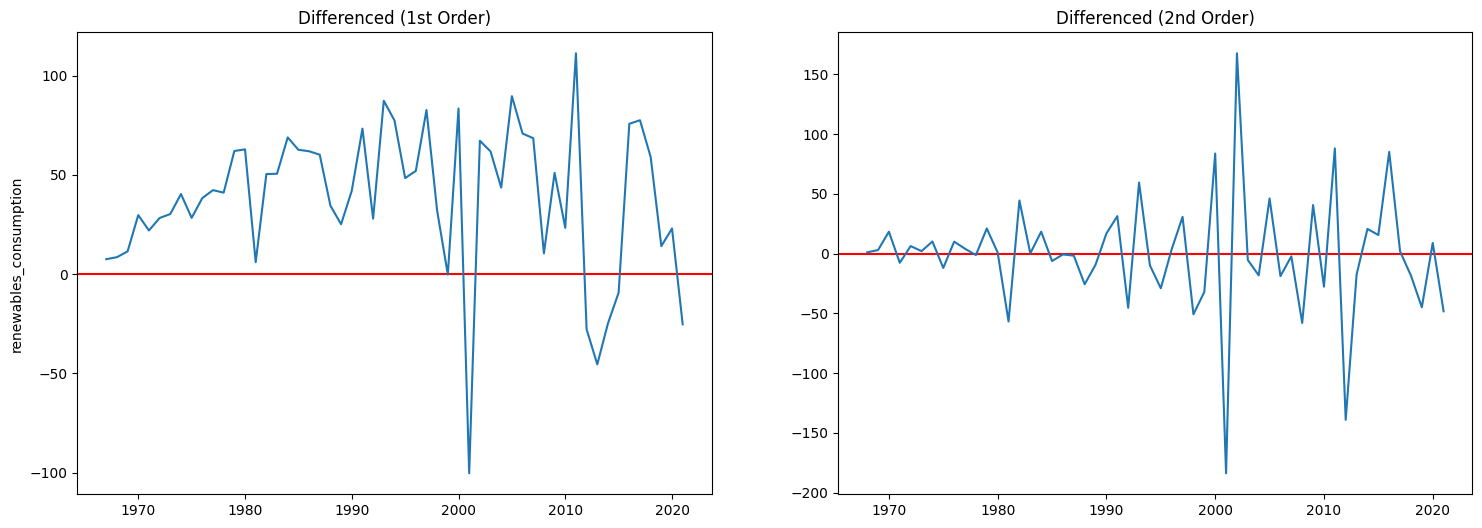

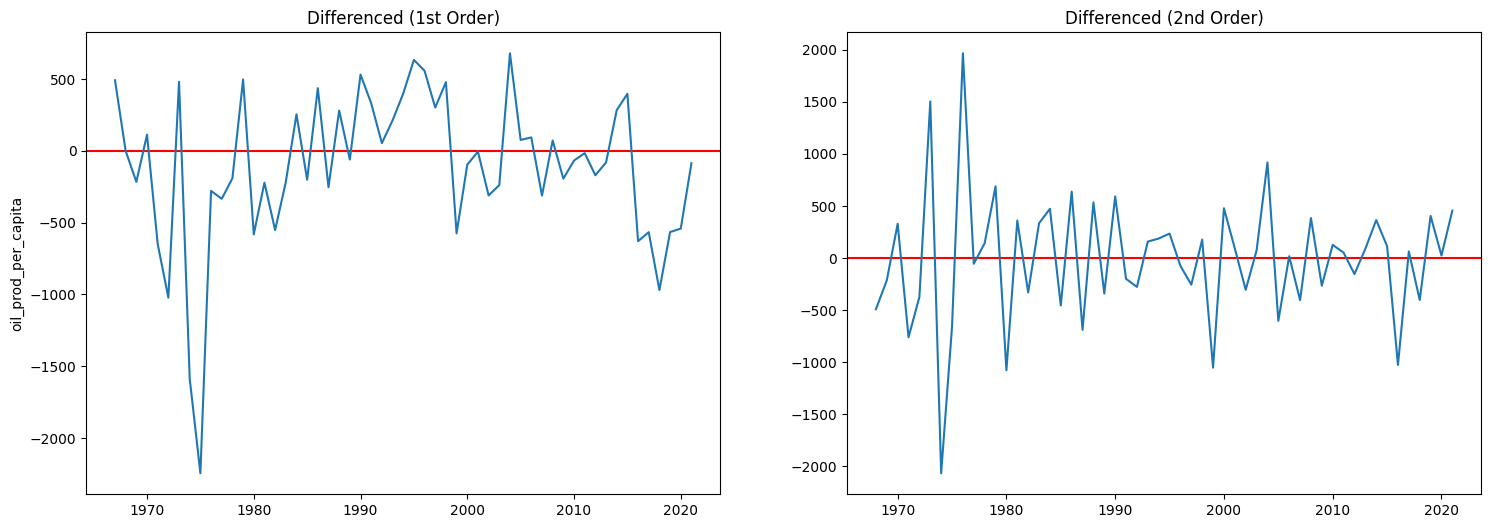

In [143]:
sa_diff1 = sa_df.diff().dropna()

# plotting 1st and 2nd order differencing for each column
for column in sa_diff1.columns:
    fig, ax = plt.subplots(1, 2, figsize=(18,6))
    ax[0].set_ylabel(f"{column}")
    ax[0].axhline(y=0, c='red')
    ax[1].axhline(y=0, c='red')

    # first order differencing
    sa_diff1[column].plot(ax=ax[0])
    result = adfuller(sa_diff1[column])
    print(f'{column} 1st order differencing p-value: {result[1]}')
    
    # second order differencing
    sa_diff2 = sa_diff1.diff().dropna()
    sa_diff2[column].plot(ax=ax[1])
    result = adfuller(sa_diff2[column])
    print(f'{column} 2nd order differencing p-value: {result[1]}')
    print()
    
    ax[0].set_title('Differenced (1st Order)')
    ax[1].set_title('Differenced (2nd Order)')

We observe that renewables_share_energy and the other 5 columns (as exogenous variables) require 2nd order differencing and hence we set **d = 2** for all 6 columns.

We now plot the ACF and PACF plots to determine the order of auto-regression (p) and moving average (q). The **ACF will determine q** while **PACF will determine p**.

**ACF** - looks at correlation between time series and its lagged values only (MA-component models the error terms of the differenced series and includes correlation due to other past values, hence ACF determines q)

**PACF** - looks at correlation between time series and its lagged values after controlling effects of shorter lags (AR-component models the direct dependence of current value with specific past values, hence PACF determines p)

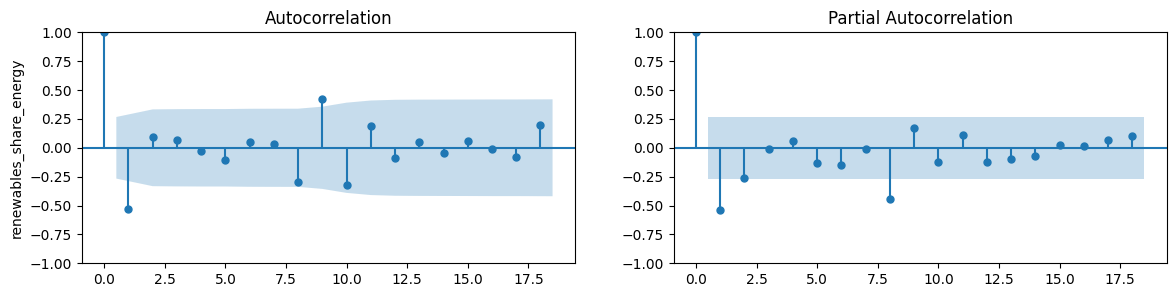

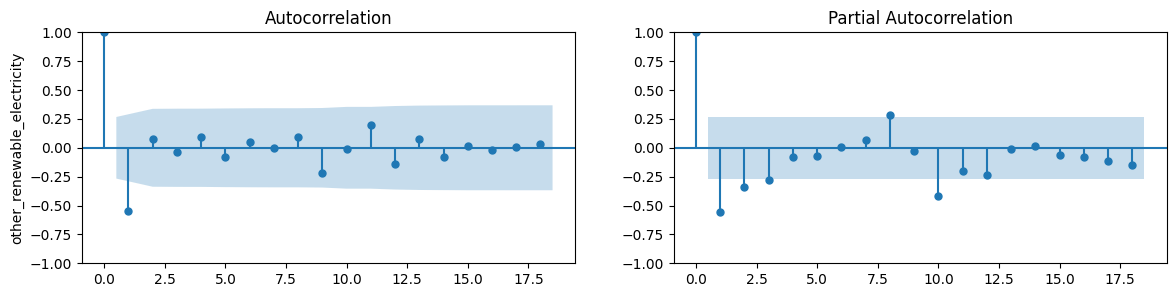

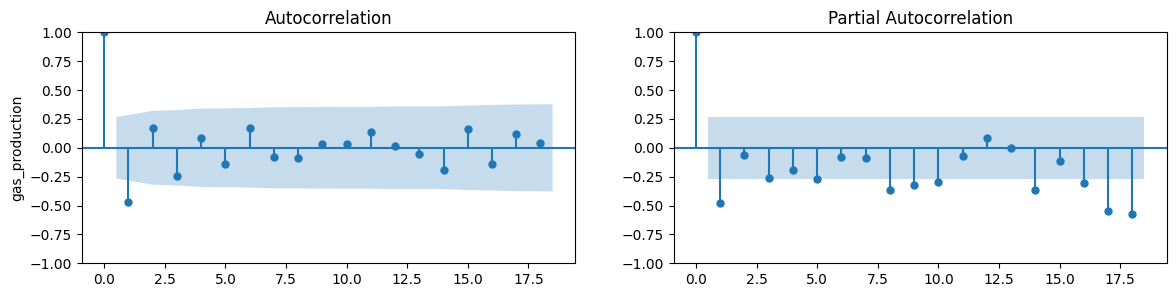

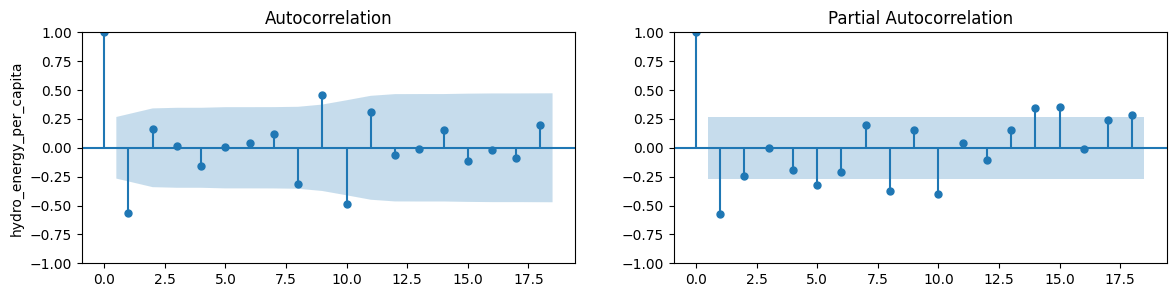

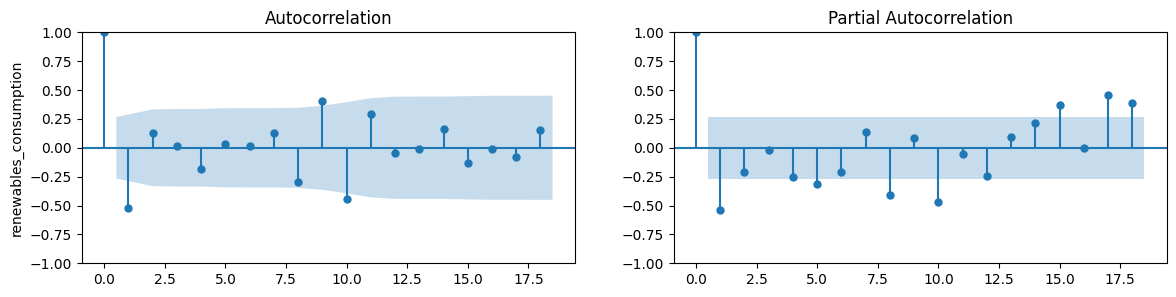

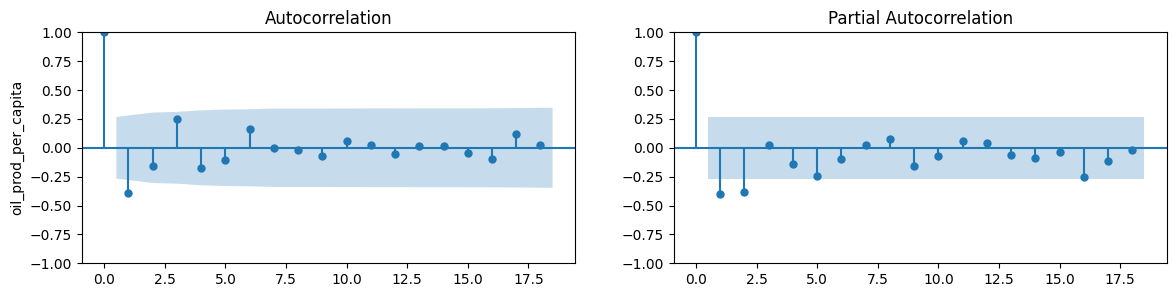

In [144]:
sa_diff2 = sa_diff1.diff().dropna()

# plotting of acf and pacf plots for differenced series
for col in sa_diff2.columns:
    fig, ax = plt.subplots(1,2, figsize=(14,3))
    ax[0].set_ylabel(f"{col}")
    acf_diff = plot_acf(sa_diff2[col], ax=ax[0])
    pacf_diff = plot_pacf(sa_diff2[col], ax=ax[1])

We observe the following signfiicant lags for the ACF and PACF plots:

**1. renewables_share_energy**
- ACF: 1, 9
- PACF: 1, 8

**2. other_renewable_electricity**
- ACF: 1
- PACF: 1, 2, 3, 8, 10

**3. gas_production**
- ACF: 1
- PACF: 1, 8, 9, 10, 14, 16, 17, 18

**4. hydro_energy_per_capita**
- ACF: 1, 9, 10
- PACF: 1, 5, 8, 10, 14, 15

**5. renewables_consumption**
- ACF: 1, 9, 10
- PACF: 1, 5, 8, 10, 15, 17, 18

**6. oil_prod_per_capita**
- ACF: 1
- PACF: 1, 2

We observed that all plots have significant spikes at lag 1. To keep things simple, we determine the ARIMA models to be (1,2,1) for now

                                  SARIMAX Results                                  
Dep. Variable:     renewables_share_energy   No. Observations:                   56
Model:                      ARIMA(1, 2, 1)   Log Likelihood                 -73.134
Date:                     Sun, 09 Apr 2023   AIC                            152.268
Time:                             14:54:17   BIC                            158.235
Sample:                                  0   HQIC                           154.570
                                      - 56                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3399      0.163     -2.086      0.037      -0.659      -0.020
ma.L1         -0.7147      0.099     -7.245      0.000      -0.908      -0.521
sigma2      

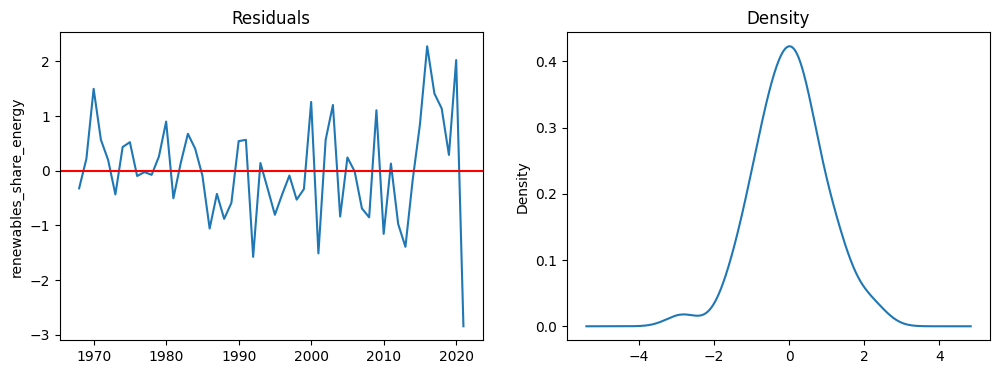

In [145]:
from statsmodels.tsa.arima.model import ARIMA

# renewables_share_energy - (ACF: 1, 9) (PACF: 1, 8)
# determine the 3 parameters for ARIMA first
p = 1
d = 2
q = 1

# model with specified order
model = ARIMA(sa_df['renewables_share_energy'], order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

# plot residuals and density distribution - should be white noise for residuals and normally distributed
residuals = model_fit.resid[2:]
fig, ax = plt.subplots(1,2, figsize=(12,4))
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
ax[0].set_ylabel('renewables_share_energy')
ax[0].axhline(y=0, c='red')

                                    SARIMAX Results                                    
Dep. Variable:     other_renewable_electricity   No. Observations:                   56
Model:                          ARIMA(1, 2, 1)   Log Likelihood                -102.636
Date:                         Sun, 09 Apr 2023   AIC                            211.272
Time:                                 14:54:17   BIC                            217.239
Sample:                                      0   HQIC                           213.573
                                          - 56                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2053      0.172     -1.196      0.232      -0.542       0.131
ma.L1         -0.5968      0.126     -4.731      0.000     

Text(0, 0.5, 'other_renewable_electricity')

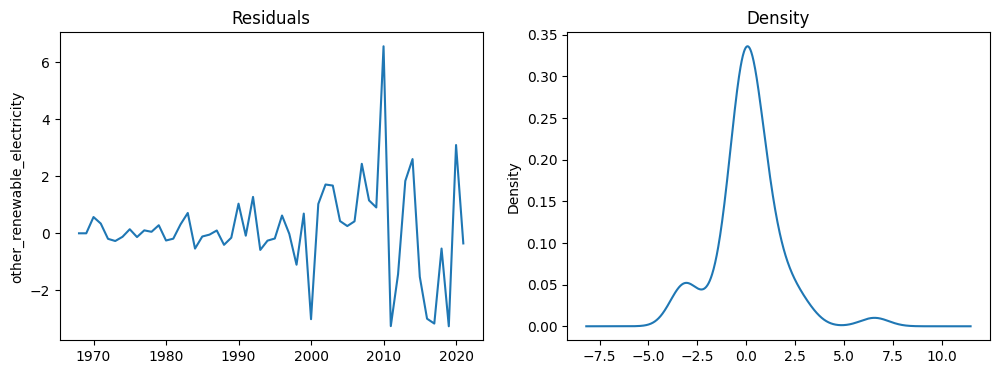

In [146]:
# other_renewable_electricity (ACF: 1) (PACF: 1, 2, 3, 8, 10)
# determine the 3 parameters for ARIMA first
p = 1
d = 2
q = 1

# model with specified order
model = ARIMA(sa_df['other_renewable_electricity'], order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

# plot residuals and density distribution - should be white noise for residuals and normally distributed
residuals = model_fit.resid[2:]
fig, ax = plt.subplots(1,2, figsize=(12,4))
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
ax[0].set_ylabel('other_renewable_electricity')

                               SARIMAX Results                                
Dep. Variable:         gas_production   No. Observations:                   56
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -271.449
Date:                Sun, 09 Apr 2023   AIC                            548.899
Time:                        14:54:18   BIC                            554.865
Sample:                             0   HQIC                           551.200
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1839      0.166      1.109      0.267      -0.141       0.509
ma.L1         -0.8980      0.100     -9.019      0.000      -1.093      -0.703
sigma2      1328.0671    182.850      7.263      0.0

Text(0, 0.5, 'gas_production')

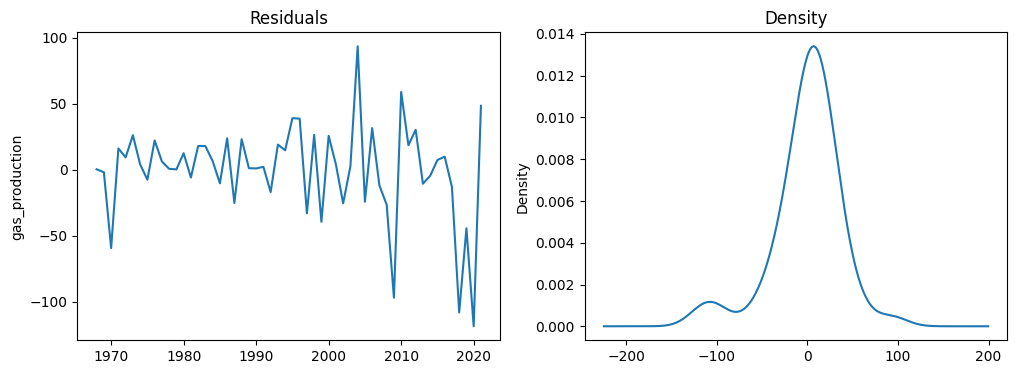

In [147]:
# gas_production (ACF: 1) (PACF: 1, 8, 9, 10, 14, 16, 17, 18)
# determine the 3 parameters for ARIMA first
p = 1
d = 2
q = 1

# model with specified order
model = ARIMA(sa_df['gas_production'], order=(p,d,q))
model_fit = model.fit()

# check the summary columns for coef (to be non-zero) and P >|z| to be less than 0.05
print(model_fit.summary())

# plot residuals and density distribution - should be white noise for residuals and normally distributed
residuals = model_fit.resid[2:]
fig, ax = plt.subplots(1,2, figsize=(12,4))
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
ax[0].set_ylabel('gas_production')


                                  SARIMAX Results                                  
Dep. Variable:     hydro_energy_per_capita   No. Observations:                   56
Model:                      ARIMA(1, 2, 1)   Log Likelihood                -334.237
Date:                     Sun, 09 Apr 2023   AIC                            674.474
Time:                             14:54:18   BIC                            680.441
Sample:                                  0   HQIC                           676.776
                                      - 56                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0551      0.159     -0.346      0.730      -0.368       0.257
ma.L1         -0.7810      0.121     -6.431      0.000      -1.019      -0.543
sigma2      

Text(0, 0.5, 'hydro_energy_per_capita')

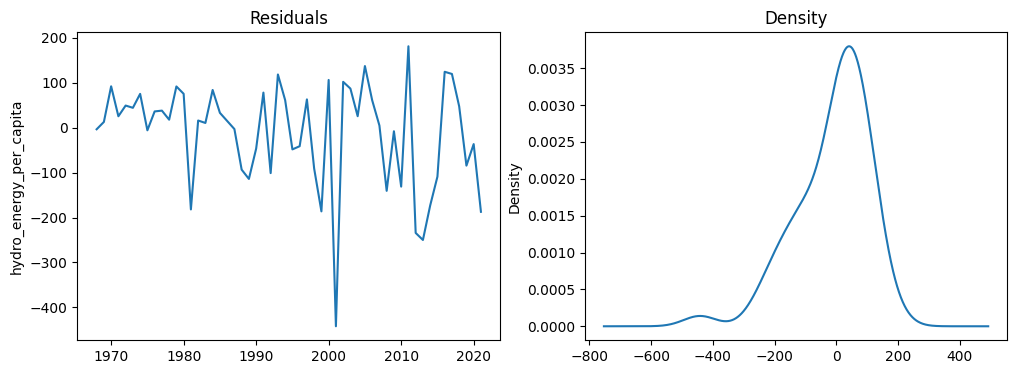

In [148]:
# hydro_energy_per_capita (ACF: 1, 9, 10) (PACF: 1, 5, 8, 10, 14, 15)
# determine the 3 parameters for ARIMA first
p = 1
d = 2
q = 1

# model with specified order
model = ARIMA(sa_df['hydro_energy_per_capita'], order=(p,d,q))
model_fit = model.fit()

# check the summary columns for coef (to be non-zero) and P >|z| to be less than 0.05
print(model_fit.summary())

# plot residuals and density distribution - should be white noise for residuals and normally distributed
residuals = model_fit.resid[2:]
fig, ax = plt.subplots(1,2, figsize=(12,4))
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
ax[0].set_ylabel('hydro_energy_per_capita')

                                 SARIMAX Results                                  
Dep. Variable:     renewables_consumption   No. Observations:                   56
Model:                     ARIMA(1, 2, 1)   Log Likelihood                -274.486
Date:                    Sun, 09 Apr 2023   AIC                            554.972
Time:                            14:54:19   BIC                            560.938
Sample:                                 0   HQIC                           557.273
                                     - 56                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1018      0.120      0.846      0.397      -0.134       0.338
ma.L1         -0.9996      6.332     -0.158      0.875     -13.410      11.411
sigma2      1419.912

Text(0, 0.5, 'renewables_consumption')

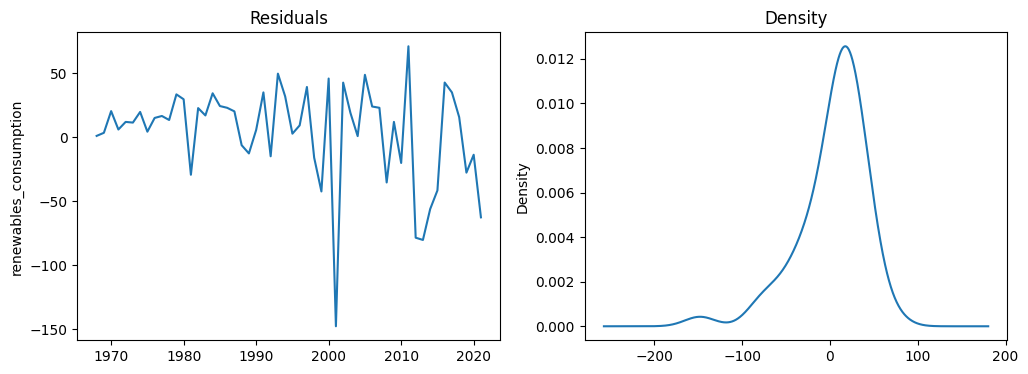

In [149]:
# renewables_consumption (ACF: 1, 9, 10) (PACF: 1, 5, 8, 10, 15, 17, 18)
# determine the 3 parameters for ARIMA first
p = 1
d = 2
q = 1

# model with specified order
model = ARIMA(sa_df['renewables_consumption'], order=(p,d,q))
model_fit = model.fit()

# check the summary columns for coef (to be non-zero) and P >|z| to be less than 0.05
print(model_fit.summary())

# plot residuals and density distribution - should be white noise for residuals and normally distributed
residuals = model_fit.resid[2:]
fig, ax = plt.subplots(1,2, figsize=(12,4))
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
ax[0].set_ylabel('renewables_consumption')

                                SARIMAX Results                                
Dep. Variable:     oil_prod_per_capita   No. Observations:                   56
Model:                  ARIMA(2, 2, 1)   Log Likelihood                -420.646
Date:                 Sun, 09 Apr 2023   AIC                            849.292
Time:                         14:54:19   BIC                            857.248
Sample:                              0   HQIC                           852.360
                                  - 56                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3484      0.630     -0.553      0.580      -1.582       0.886
ar.L2         -0.2241      0.162     -1.382      0.167      -0.542       0.094
ma.L1          0.0318      0.670      0.047 

Text(0, 0.5, 'oil_prod_per_capita')

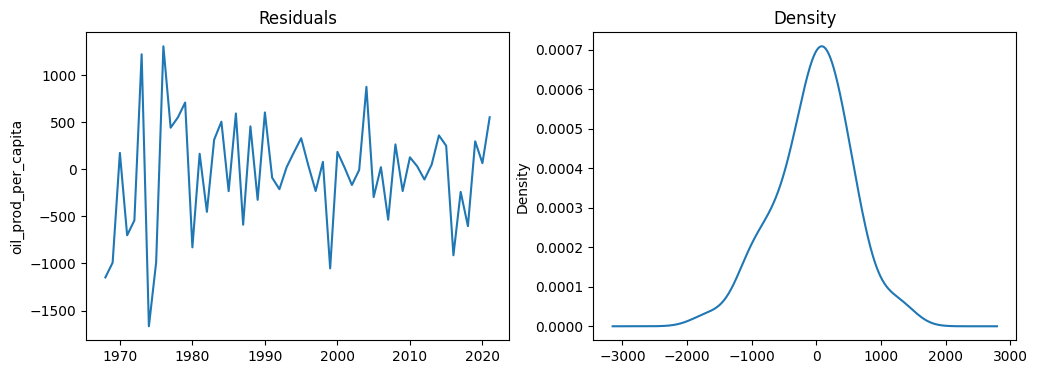

In [150]:
# oil_prod_per_capita (ACF: 1) (PACF: 1, 2)
# determine the 3 parameters for ARIMA first
p = 2
d = 2
q = 1

# model with specified order
model = ARIMA(sa_df['oil_prod_per_capita'], order=(p,d,q))
model_fit = model.fit()

# check the summary columns for coef (to be non-zero) and P >|z| to be less than 0.05
print(model_fit.summary())

# plot residuals and density distribution - should be white noise for residuals and normally distributed
residuals = model_fit.resid[2:]
fig, ax = plt.subplots(1,2, figsize=(12,4))
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
ax[0].set_ylabel('oil_prod_per_capita')

We see that it is reasonably stationary and usable for an ARIMA modelling for (1,2,1). We will initialise the ARIMA model first and check back on how to tweak it afterwards.

Training Size: 52
Test Size: 5
Mean Squared Error: 3.6800169881360256


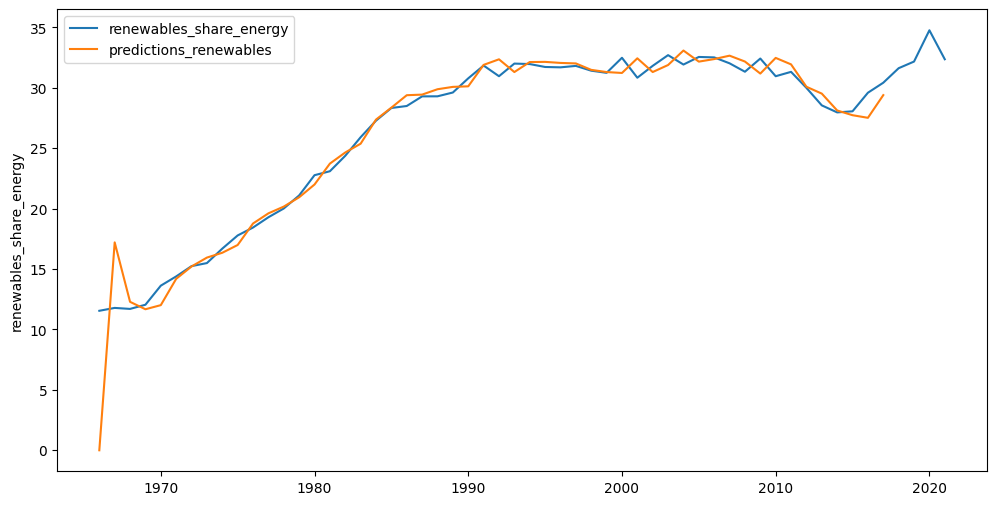

In [151]:
# intialise copy of sa_df for arima modelling
sa_df1 = sa_df.copy()

# Split the data into training and testing sets
train_data = sa_df.loc[:'2017']
test_data = sa_df.loc['2017':]
print(f'Training Size: {len(train_data)}')
print(f'Test Size: {len(test_data)}')

p_other, d_other, q_other = 1, 2, 1
p_gas, d_gas, q_gas = 1, 2, 1
p_hydro, d_hydro, q_hydro = 1, 2, 1
p_renew, d_renew, q_renew = 1, 2, 1
p_oil, d_oil, q_oil = 2, 2, 1

# fit univariate ARIMA models to each exogenous variable (i.e. excluding renewables_share_energy)a
# select the best hyperparameters based on the AIC
model_other = ARIMA(train_data['other_renewable_electricity'], order=(p_other, d_other, q_other)).fit()
model_gas = ARIMA(train_data['gas_production'], order=(p_gas, d_gas, q_gas)).fit()
model_hydro = ARIMA(train_data['hydro_energy_per_capita'], order=(p_hydro, d_hydro, q_hydro)).fit()
model_renew = ARIMA(train_data['renewables_consumption'], order=(p_renew, d_renew, q_renew)).fit()
model_oil = ARIMA(train_data['oil_prod_per_capita'], order=(p_oil, d_oil, q_oil)).fit()

# combine the three columns into a single dataframe, using the training set only
train_data_combined = pd.concat([train_data['renewables_share_energy'], model_other.fittedvalues, model_gas.fittedvalues, model_hydro.fittedvalues, model_renew.fittedvalues, model_oil.fittedvalues], axis=1)
train_data_combined.columns = sa_df1.columns[:6]

# Fit a multivariate ARIMA model to the combined data
p = 1
d = 2
q = 1
model = ARIMA(train_data_combined['renewables_share_energy'], exog=train_data_combined.iloc[:, 1:], order=(p, d, q))
results = model.fit()

# use the fitted model to make predictions on the testing set
exog_test = test_data.iloc[:, 1:6]
predictions = results.predict(exog=exog_test)

mse = mean_squared_error(train_data['renewables_share_energy'], predictions)
print(f"Mean Squared Error: {mse}")

sa_df1['predictions_renewables'] = predictions
sa_df1[['renewables_share_energy', 'predictions_renewables']].plot(ylabel = 'renewables_share_energy', figsize=(12,6));

Mean Squared Error: 6.789477910717477


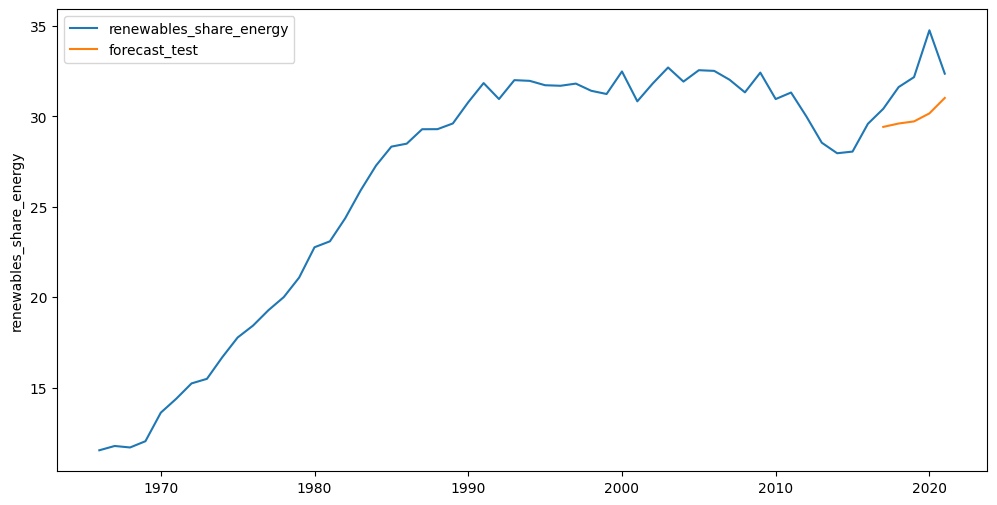

In [152]:
forecast_test = results.forecast(len(test_data['renewables_share_energy']), exog=exog_test)
sa_df['forecast_test'] = [None]*(len(train_data) - 1) + list(forecast_test)
sa_df[['renewables_share_energy', 'forecast_test']].plot(ylabel = 'renewables_share_energy', figsize=(12,6))

mse = mean_squared_error(test_data['renewables_share_energy'], forecast_test)
print(f"Mean Squared Error: {mse}")

We see that the ARIMA model is highly sensitive to the most recent data and trend which caused the data to deviate below the actual test values.

We take note of this as a flaw of the model itself and looking at the whole dataset, we will drop 2020 onwards as the drop is affected by the COVID-19 pandemic which we see as a black-swan event.

We tweak certain parameters as well and fit the whole data set into the model.

                                  SARIMAX Results                                  
Dep. Variable:     renewables_share_energy   No. Observations:                   54
Model:                      ARIMA(1, 2, 1)   Log Likelihood                 -59.396
Date:                     Sun, 09 Apr 2023   AIC                            134.792
Time:                             14:54:20   BIC                            150.402
Sample:                                  0   HQIC                           140.777
                                      - 54                                         
Covariance Type:                       opg                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
other_renewable_electricity     0.1003      0.074      1.347      0.178      -0.046       0.246
gas_production                  0.0015  

<Axes: ylabel='renewables_share_energy'>

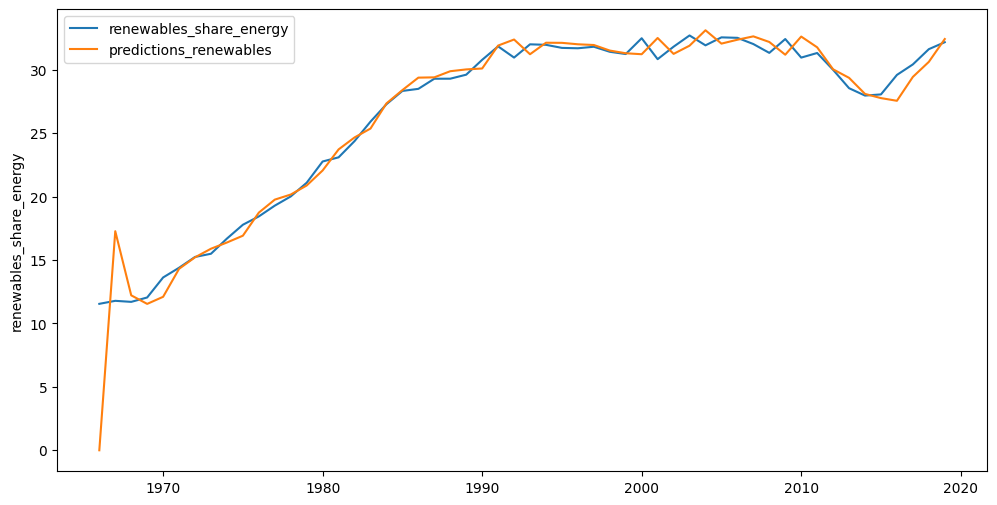

In [153]:
# remake sa_df for the whole time series
sa_df2 = sa_df1.drop(index=[2020, 2021])

p_other, d_other, q_other = 1, 2, 1
p_gas, d_gas, q_gas = 1, 2, 1
p_hydro, d_hydro, q_hydro = 1, 2, 1
p_renew, d_renew, q_renew = 1, 2, 1
p_oil, d_oil, q_oil = 1, 2, 1

# fit univariate ARIMA models to each exogenous variable (i.e. excluding renewables_share_energy)a
# select the best hyperparameters based on the AIC
model_other = ARIMA(sa_df2['other_renewable_electricity'], order=(p_other, d_other, q_other)).fit()
model_gas = ARIMA(sa_df2['gas_production'], order=(p_gas, d_gas, q_gas)).fit()
model_hydro = ARIMA(sa_df2['hydro_energy_per_capita'], order=(p_hydro, d_hydro, q_hydro)).fit()
model_renew = ARIMA(sa_df2['renewables_consumption'], order=(p_renew, d_renew, q_renew)).fit()
model_oil = ARIMA(sa_df2['oil_prod_per_capita'], order=(p_oil, d_oil, q_oil)).fit()

# combine the three columns into a single dataframe, using the training set only
sa_df2_exog = pd.concat([model_other.fittedvalues, model_gas.fittedvalues, model_hydro.fittedvalues, model_renew.fittedvalues, model_oil.fittedvalues], axis=1)
sa_df2_exog.columns = ['other_renewable_electricity', 'gas_production', 'hydro_energy_per_capita', 'renewables_consumption', 'oil_prod_per_capita']

# Fit a ARIMA model to the combined data
model = ARIMA(sa_df2['renewables_share_energy'], exog=sa_df2_exog, order=(1, 2, 1))
model_fit = model.fit()
print(model_fit.summary())

# use the fitted model to make predictions on the testing set
predictions = model_fit.predict(exog=sa_df2_exog)

mse = mean_squared_error(sa_df2['renewables_share_energy'], predictions)
print(f"Mean Squared Error: {mse}")

sa_df2['predictions_renewables'] = predictions
sa_df2[['renewables_share_energy', 'predictions_renewables']].plot(ylabel = 'renewables_share_energy', figsize=(12,6))

We now use this trained model to forecast data up to 2050 to see if South America can fully rely on renewables

In [154]:
start_year = 2020
end_year = 2050
steps = end_year - start_year + 1

# forecast future values from years 2022 to 2050
forecast_other = model_other.forecast(steps=steps)
forecast_gas = model_gas.forecast(steps=steps)
forecast_hydro = model_hydro.forecast(steps=steps)
forecast_renew = model_renew.forecast(steps=steps)
forecast_oil = model_oil.forecast(steps=steps)
forecast_index = pd.Series(list(np.arange(start_year,end_year+1)))

# combine both exogeneous data
forecast_exog = pd.concat([forecast_other, forecast_gas, forecast_hydro, forecast_renew, forecast_oil], axis=1)
forecast_exog.columns = ['forecast_other', 'forecast_gas', 'forecast_hydro', 'forecast_renew', 'forecast_oil']
forecast_exog.set_index(forecast_index, inplace=True)

# predict renewables data up till 2050
forecast_renewables = pd.DataFrame(model_fit.forecast(steps=steps, exog=forecast_exog))
forecast_renewables.set_index(forecast_index, inplace=True)

# shortcut to remove warnings when forecasting
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# combine all data together
forecast_results = pd.merge(forecast_exog, forecast_renewables, how='outer', left_index=True, right_index=True)
forecast_results.rename({'predicted_mean':'forecast_renewables'}, inplace=True, axis=1)

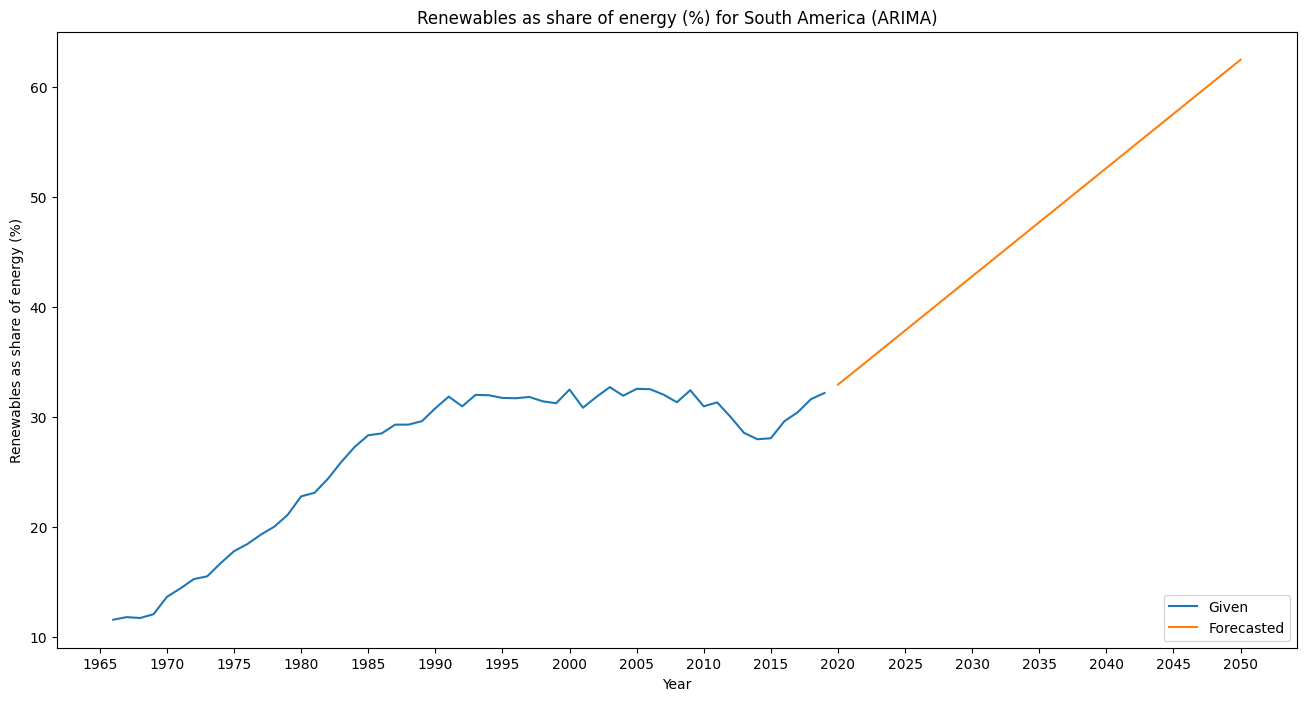

In [155]:
# plot both given data and predicted data rogether
forecast_df = pd.concat([sa_df2, forecast_results])

fig = plt.figure(figsize=(16,8))
plt.plot(forecast_df['renewables_share_energy'], label='Given')
plt.plot(forecast_df['forecast_renewables'], label = 'Forecasted')
plt.title('Renewables as share of energy (%) for South America (ARIMA)')
plt.xlabel('Year')
plt.ylabel('Renewables as share of energy (%)')
plt.xticks(np.arange(min(forecast_df.index)-1, max(forecast_df.index)+1, 5))
plt.legend(loc='lower right', );

The ARIMA model forecasts a more optimistic view of the renewable energy share for South America and predicts that in 2050, around 60% of energy will be renewables for South America. Notably, it is hard to fit an accurate ARIMA model especially for a less clear trend in South America. It seems that it should be more of a logarithmic curve which the Exponential Smoothing does better for.

We move on to another model that better uses multi-variables for a time series, called the **Vector Auto Regression**

### Vector Auto Regression (VAR)

**Difference between VAR and ARIMA**

While both account for the presence of exogenous variables in the dataset, VAR capture the interdependencies and feedback effects between all variables in the system, while ARIMA models with exogenous variables only model the relationship between the dependent variable and the exogenous variables.

VAR requires the data to be stationary as well, hence we use sa_diff2 as the starting point where all data point are differenced twice.

In [156]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR

# define exogenous variables
vars = ['other_renewable_electricity', 'gas_production', 'hydro_energy_per_capita', 'renewables_consumption', 'oil_prod_per_capita']

# define max lag for casuality test
maxlag = 10

for var in vars:
    # run Granger causality test
    results = grangercausalitytests(sa_diff2[['renewables_share_energy', var]], maxlag=maxlag, verbose=False)

    # extract the p-values for each lag
    p_values = [results[i+1][0]['params_ftest'][1] for i in range(maxlag)]

    # find the lowest p-value
    min_p_value = min(p_values)

    # print the lowest p-value
    print(f"Lowest p-value at maxlag of {maxlag} for {var}:", min_p_value)

Lowest p-value at maxlag of 10 for other_renewable_electricity: 0.002686478783816719
Lowest p-value at maxlag of 10 for gas_production: 0.458358577136465
Lowest p-value at maxlag of 10 for hydro_energy_per_capita: 0.04804466942155105
Lowest p-value at maxlag of 10 for renewables_consumption: 0.051419374165720684
Lowest p-value at maxlag of 10 for oil_prod_per_capita: 0.2098100234855633


We find out that only **other_renewable_electricity** and **hydro_energy_per_capita** at a lenient maxlag allowance of 5 refutes the null hypothesis that the variable Granger-causes a change in renewables_share_energy. Hence we will only stick with these 2 columns and renewables_share_energy

In [157]:
# initialise dataframe for VAR
var_df = sa_df[['renewables_share_energy', 'other_renewable_electricity', 'hydro_energy_per_capita']]
var_diff = sa_diff2[['renewables_share_energy', 'other_renewable_electricity', 'hydro_energy_per_capita']]
var_exog = ['other_renewable_electricity', 'hydro_energy_per_capita']

# split data into training and testing sets
train_data = var_diff.loc[:2005]
test_data = var_diff.loc[2005:]
test_size = len(test_data)
print(f"Test Size: {test_size}")

Test Size: 17


In [158]:
# select appropriate lag amount
var_model = VAR(train_data)
res = var_model.select_order(maxlags=5)
print(res.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       9.035       9.171       8391.       9.081
1       7.859       8.403       2597.       8.042
2       7.329      8.281*       1554.      7.649*
3       7.424       8.784       1777.       7.881
4      7.171*       8.940      1489.*       7.766
5       7.251       9.427       1840.       7.983
-------------------------------------------------


In [159]:
# we use maxlags of 4 as it has the lowest AIC values
maxlag = 4

# fit the VAR model
model = VAR(train_data, exog=train_data[var_exog])
results = model.fit(maxlags=maxlag)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, Apr, 2023
Time:                     14:54:21
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -120.390
Nobs:                     34.0000    HQIC:                  -121.721
Log likelihood:           1981.24    FPE:                8.36803e-54
AIC:                     -122.410    Det(Omega_mle):     2.79558e-54
--------------------------------------------------------------------
Results for equation renewables_share_energy
                                    coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------
const                                 -0.050346         0.080407           -0.626           0.531
other_renewable_electricity           -0.067416         0.120046        

In [160]:
def invert_transformation(data_diff, pred):
    fc = pred.copy()
    cols = var_df.columns
    for col in cols:
        fc[str(col)+'_pred'] = var_df[col].iloc[-1] + fc[str(col)+'_pred'].cumsum()
    return fc

forecast = pd.DataFrame(results.forecast(test_data.values, exog_future=test_data[var_exog], steps=test_size), columns=var_diff.columns + '_pred')

output = invert_transformation(var_diff, forecast)
output_renew = pd.DataFrame(output['renewables_share_energy_pred'])

# evaluate forecasts
mse = mean_squared_error(sa_df['renewables_share_energy'].loc[test_data.index.min():], output_renew)
print('MSE: %.3f' % mse)

MSE: 17.262


Text(0.5, 1.0, 'Trained Model with Predicted Values vs Test Data')

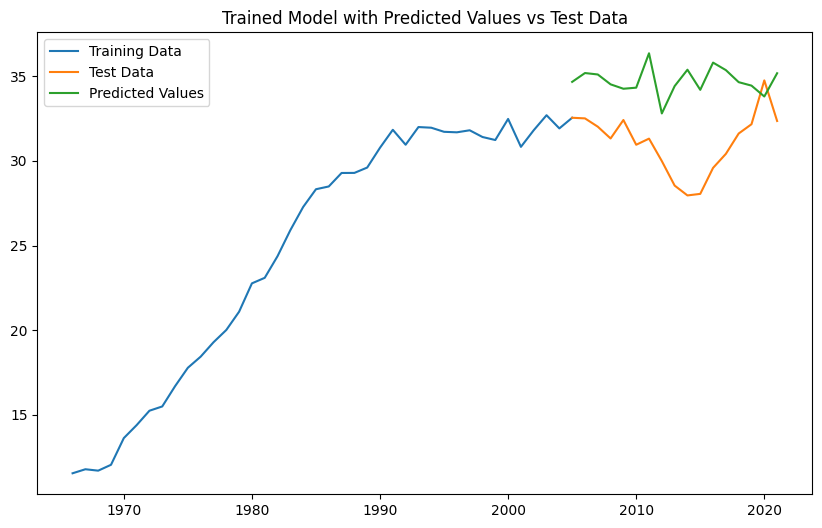

In [161]:
# Plot the results
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(sa_df['renewables_share_energy'].loc[:test_data.index.min()], label = 'Training Data')
ax.plot(test_data.index, sa_df['renewables_share_energy'].loc[test_data.index.min():], label='Test Data')
ax.plot(test_data.index, output_renew, label='Predicted Values')
ax.legend()
ax.set_title('Trained Model with Predicted Values vs Test Data')